In [1]:

import pandas as pd
df = pd.read_csv('/srv/data-mining/data/IMDB/imdb.csv', index_col=None, na_values="?")
df.head(n=1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,quality
0,Color,James-Cameron,723.0,178.0,0.0,855.0,Joel-David-Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,good


In [2]:
df['gross'].head()

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
4            NaN
Name: gross, dtype: float64

In [3]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Task 1


Float and integer are not the same. An integer is a "whole" number, whereas a float allows for decimals. This probably explains why "budget" shows up as float, and some facebook likes show up as integers (not all though).

In [4]:
#df[’facenumber_in_poster’].value_counts().plot(kind=’bar’).

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

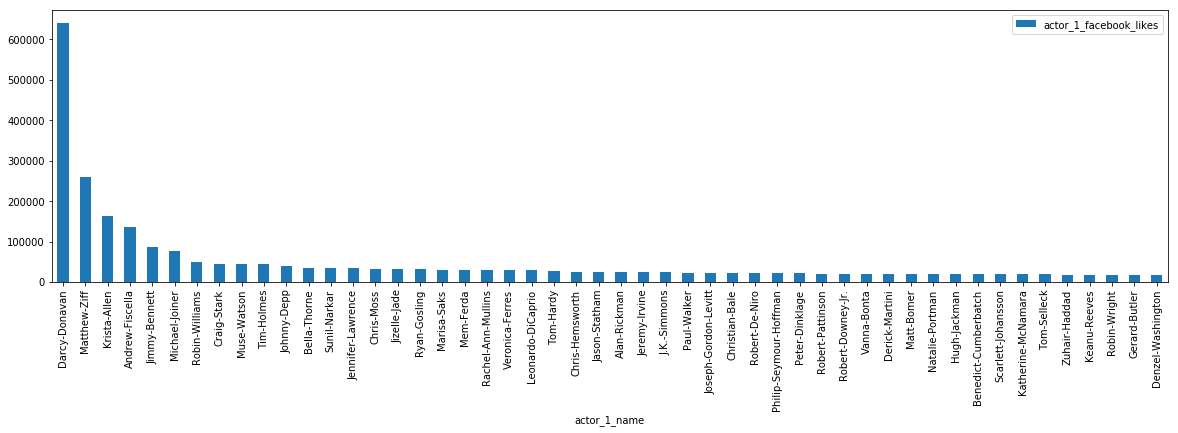

In [6]:
p_df = df.drop_duplicates('actor_1_name')
p_df = p_df.sort_values('actor_1_facebook_likes', ascending=False)
p_df = p_df.head(50)
p_df.plot(x='actor_1_name', y='actor_1_facebook_likes',
kind='bar', figsize=(20, 5))

Task 2

Donavan's and Ziff's roles seem to be minor, in both television and films. Therefore, it would be hard to say that it was their roles that made them famous.

Donavan currently has over 3 million likes, while Ziff has 54 thousand likes, both exceed the figures given in the plot.

In [7]:
df[df['actor_1_name'] == 'Darcy-Donavan'][
['movie_title', 'actor_1_name',
'actor_2_name', 'actor_1_facebook_likes']]

,movie_title,actor_1_name,actor_2_name,actor_1_facebook_likes
1902,Anchorman:-The-Legend-of-Ron-Burgundy-,Darcy-Donavan,Will-Ferrell,640000.0


In [8]:
df[df['actor_1_name'] == 'Matthew-Ziff'][
['movie_title', 'actor_1_name',
'actor_2_name', 'actor_1_facebook_likes']]

,movie_title,actor_1_name,actor_2_name,actor_1_facebook_likes
4409,Kickboxer:-Vengeance-,Matthew-Ziff,T.J.-Storm,260000.0
4592,Hardflip-,Matthew-Ziff,Randy-Wayne,260000.0
4704,Treachery-,Matthew-Ziff,Lorraine-Ziff,260000.0


Task 3

Ferrell should be in the column actor_1_name, instead of grouped within actor 2.

Is unlikely that the actors are grouped alphabetically, as this anomaly is not found with Matthew Ziff's films, where, with that logic, Ziff would be grouped last.

Will Ferrell has 10 million likes at the moment.

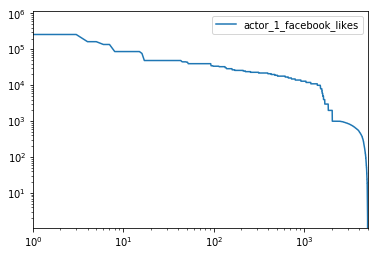

In [9]:
l_df = df['actor_1_facebook_likes'].sort_values(ascending=False)
l_df = l_df.reset_index()
l_df.plot(y='actor_1_facebook_likes', kind='line', loglog=True)

Task 4

Despite the downward trend, the plot does not exactly follow a Zipfian distribution, which can be seen that the tail does not hint at larger values being less frequent, on the X axis.

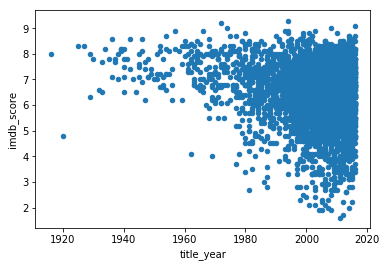

In [10]:
df.plot(kind='scatter', x='title_year', y='imdb_score')

In [11]:
from scipy.stats import pearsonr
corr = pearsonr(df['title_year'].fillna(0), df['imdb_score'].fillna(0))
print("r={0}, p={1}".format(*corr))

r=-0.15569995585608865, p=1.16534357702956e-28


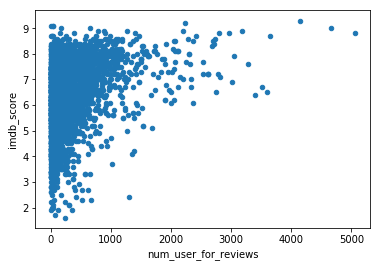

In [12]:
df.plot(kind='scatter', x='num_user_for_reviews', y='imdb_score')

In [13]:
from scipy.stats import pearsonr
corr = pearsonr(df['num_user_for_reviews'].fillna(0), df['imdb_score'].fillna(0))
print("r={0}, p={1}".format(*corr))

r=0.2902646752855314, p=3.2327608364230235e-98


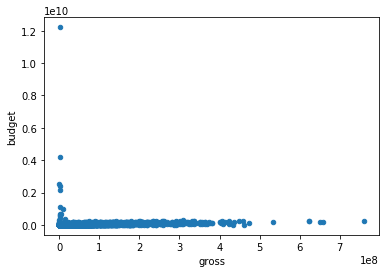

In [14]:
df.plot(kind='scatter', x='gross', y='budget')

In [15]:
from scipy.stats import pearsonr
corr = pearsonr(df['duration'].fillna(0), df['gross'].fillna(0))
print("r={0}, p={1}".format(*corr))

r=0.2537621734571244, p=9.691588067435706e-75


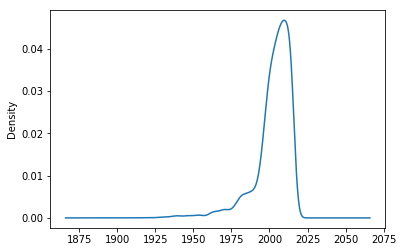

In [16]:
df['title_year'].plot(kind='kde')

In [17]:
df[df['gross'] > 6 * 1e8][['movie_title', 'gross', 'budget']
].sort_values('gross', ascending=False)

,movie_title,gross,budget
0,Avatar-,760505847.0,237000000.0
26,Titanic-,658672302.0,200000000.0
29,Jurassic-World-,652177271.0,150000000.0
17,The-Avengers-,623279547.0,220000000.0
794,The-Avengers-,623279547.0,220000000.0


In [18]:
df[df['budget'] > 0.2*1e10][['movie_title', 'gross', 'budget']
].sort_values('budget', ascending=False)

,movie_title,gross,budget
2988,The-Host-,2201412.0,1.221550e+10
3859,Lady-Vengeance-,211667.0,4.200000e+09
3005,Fateless-,195888.0,2.500000e+09
2323,Princess-Mononoke-,2298191.0,2.400000e+09
2334,Steamboy-,410388.0,2.127520e+09


Task 5

These movies are all films produced in countries other than America, and it is possible that the budget has been calculated in their production country's currency.
It would be necessary to adapt the budget and gross to the country of production, in such a way that all films are comparable.

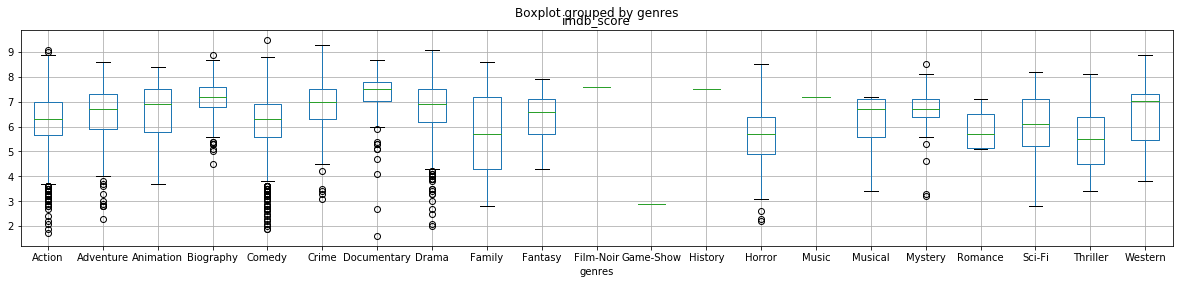

In [19]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df.boxplot(column=['imdb_score'], by='genres', figsize=(20, 4))

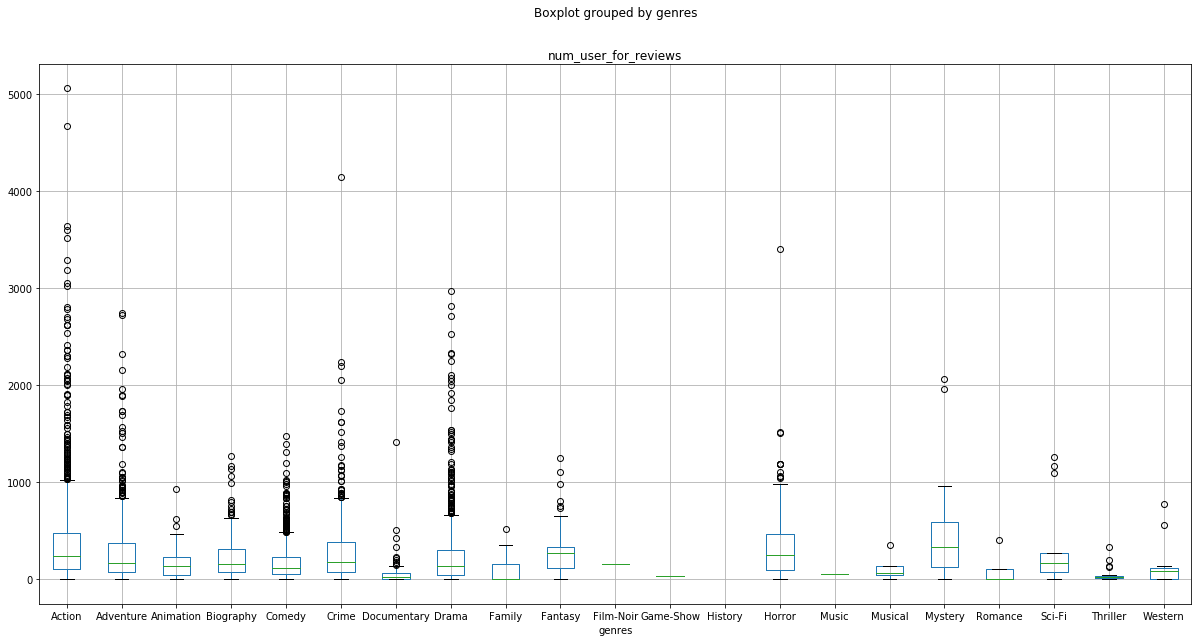

In [20]:
df.boxplot(column=['num_user_for_reviews'], by='genres', figsize=(20, 10))

Task 6.

Biography and Documentary seem to have higher ratings overall.

Documentaries seem to have the smallest number of reviews.

In [21]:
df.replace({"quality": {"very-bad": 1, "bad": 2, "okay": 3,
"good": 4, "very-good": 5}}, inplace=True)
df.pivot_table(index='quality', columns='country',
values='budget').style.background_gradient(cmap='Blues')

In [22]:
df.groupby('actor_1_name')['imdb_score'].mean().sort_values(
ascending=False).head(10)

actor_1_name
Krystyna-Janda        9.1
Jack-Warden           8.9
Rob-McElhenney        8.8
Kimberley-Crossman    8.7
Abigail-Evans         8.7
Elina-Abai-Kyzy       8.7
Jackie-Gleason        8.7
Takashi-Shimura       8.7
Maria-Pia-Calzone     8.7
Ruth-Wilson           8.6
Name: imdb_score, dtype: float64

In [23]:
from scipy.stats.mstats import zscore
df['imdb_z'] = zscore(df['imdb_score'])
pd.Series(df.groupby('actor_1_name')['imdb_z'].sum()
).sort_values(ascending=False).head(10)


actor_1_name
Tom-Hanks                 20.967048
Leonardo-DiCaprio         19.656199
Harrison-Ford             17.215400
Denzel-Washington         17.105197
Christian-Bale            15.497207
Matt-Damon                14.440725
Philip-Seymour-Hoffman    14.186358
Kevin-Spacey              13.846442
Robert-De-Niro            13.298695
Tom-Cruise                13.025713
Name: imdb_z, dtype: float64

In [24]:
pd.Series(df.groupby('actor_1_name')['imdb_z'].mean()
).sort_values(ascending=False).head(10)

actor_1_name
Krystyna-Janda        2.361291
Jack-Warden           2.183659
Rob-McElhenney        2.094843
Takashi-Shimura       2.006028
Kimberley-Crossman    2.006028
Jackie-Gleason        2.006028
Abigail-Evans         2.006028
Elina-Abai-Kyzy       2.006028
Maria-Pia-Calzone     2.006028
Bunta-Sugawara        1.917212
Name: imdb_z, dtype: float64

In [25]:
df['plot_keywords'].head(5)

0               avatar|future|marine|native|paraplegic
1    goddess|marriage-ceremony|marriage-proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police-offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [26]:
df['plot_keywords'] = df['plot_keywords'].fillna(' ')
df['plot_keywords'].head(5)

0               avatar|future|marine|native|paraplegic
1    goddess|marriage-ceremony|marriage-proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police-offi...
4                                                     
Name: plot_keywords, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)
pd.DataFrame(cv.fit_transform(df['plot_keywords']).todense(),
columns=sorted(cv.vocabulary_))

,1950s,1960s,1970s,1980s,1990s,19th,abuse,accident,action,actor,...,woods,word,worker,world,writer,written,year,york,young,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df['gross'].head(5)

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
4            NaN
Name: gross, dtype: float64

In [29]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=1)
df['gross'] = imp.fit_transform([df['gross']])[0]

In [30]:
df['gross'].head(5)

0    7.605058e+08
1    3.094042e+08
2    2.000742e+08
3    4.481306e+08
4    4.854946e+07
Name: gross, dtype: float64

In [31]:
df['genres'].value_counts()

Comedy         1325
Action         1152
Drama           969
Adventure       453
Crime           345
Biography       252
Horror          232
Documentary      83
Animation        61
Fantasy          53
Mystery          33
Thriller         21
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Film-Noir         1
Music             1
History           1
Game-Show         1
Name: genres, dtype: int64

In [32]:
df['genres'].value_counts()[:1].index[0]

'Comedy'

In [33]:
for column, dtype in df.dtypes.to_dict().items(): # for each column, dtype pair in the dataframe
    if dtype == 'object': # if the column is an object (thus discrete)
        df[column] = df[column].fillna(df[column].value_counts()[:1].index[0]) # fill with most common
        cats = df[column].astype('category') # convert to category
        df[column] = cats.cat.codes # use the category indices to convert to numeric
    else: # if the column is something else (thus numeric)
        df[column] = df[column].fillna(df[column].mean()) # take the mean

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df.pop('quality')
X = scaler.fit_transform(df)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
ˆy_baseline = [y.value_counts()[:1].index[0]] * len(y)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y, ˆy_baseline))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        41
          2       0.00      0.00      0.00       441
          3       0.55      1.00      0.71      2774
          4       0.00      0.00      0.00      1445
          5       0.00      0.00      0.00       328

avg / total       0.30      0.55      0.39      5029



In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
ˆy_test = lr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ˆy_test))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.82      0.36      0.50       124
          3       0.81      0.99      0.89       708
          4       0.86      0.76      0.81       343
          5       0.97      0.51      0.67        73

avg / total       0.83      0.83      0.81      1258



In [40]:
list(zip(df.columns[:-1], lr.coef_[2]))

[('color', 0.12930111119937662),
 ('director_name', -0.057670379549310216),
 ('num_critic_for_reviews', 0.52524081949661228),
 ('duration', 0.022374225948176372),
 ('director_facebook_likes', -0.07303298000138693),
 ('actor_3_facebook_likes', -0.054693518809420513),
 ('actor_2_name', 0.015020146799455717),
 ('actor_1_facebook_likes', -0.76356608092735323),
 ('gross', 0.33817873521399772),
 ('genres', -0.19152731287739275),
 ('actor_1_name', -0.059116139554348454),
 ('movie_title', 0.033375528797442947),
 ('num_voted_users', -1.1605797030019041),
 ('cast_total_facebook_likes', 0.97551451643134568),
 ('actor_3_name', -0.024825185585693896),
 ('facenumber_in_poster', 0.081540869377205838),
 ('plot_keywords', 0.021437732608985086),
 ('movie_imdb_link', -0.36863491137885984),
 ('num_user_for_reviews', -0.13637371613131485),
 ('language', -0.10532233660928353),
 ('country', 0.086284029975357654),
 ('content_rating', 0.010936532669854221),
 ('budget', -0.022933614252314893),
 ('title_year', 0

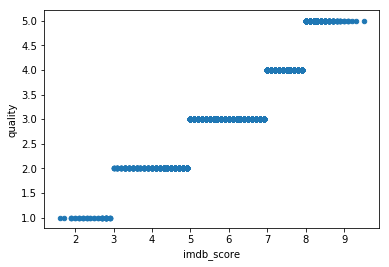

In [41]:
pd.concat([df['imdb_score'], y], axis=1).plot(kind='scatter', x='imdb_score', y='quality')

Task 7

Within the imdb_score, essentially, the scores were virtually converted into quality, that is, grouped, into quality grades. This means that the value of quality is obsolete here.

In [42]:
del df['imdb_score']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
ˆy_baseline = [y.value_counts()[:1].index[0]] * len(y)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y, ˆy_baseline))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        41
          2       0.00      0.00      0.00       441
          3       0.55      1.00      0.71      2774
          4       0.00      0.00      0.00      1445
          5       0.00      0.00      0.00       328

avg / total       0.30      0.55      0.39      5029



In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
ˆy_test = lr.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ˆy_test))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        12
          2       0.78      0.36      0.50       118
          3       0.82      1.00      0.90       681
          4       0.87      0.79      0.83       368
          5       0.92      0.46      0.61        79

avg / total       0.83      0.83      0.81      1258



In [48]:
list(zip(df.columns[:-1], lr.coef_[2]))

[('color', 0.07027920152286854),
 ('director_name', -0.038875796412216751),
 ('num_critic_for_reviews', 0.49997413950446856),
 ('duration', 0.021392680803055196),
 ('director_facebook_likes', -0.048692499113197625),
 ('actor_3_facebook_likes', -0.03374130136988264),
 ('actor_2_name', -0.018354021082736507),
 ('actor_1_facebook_likes', -0.58896804350241883),
 ('gross', 0.30551961821271389),
 ('genres', -0.18493768132962798),
 ('actor_1_name', -0.072574257286320804),
 ('movie_title', 0.0064358524326698589),
 ('num_voted_users', -1.1680261686072064),
 ('cast_total_facebook_likes', 0.74061362600902358),
 ('actor_3_name', 0.016372228414791905),
 ('facenumber_in_poster', 0.076543504857817607),
 ('plot_keywords', 0.045471481105349661),
 ('movie_imdb_link', -0.41190961054469849),
 ('num_user_for_reviews', -0.067227108715386105),
 ('language', -0.078154986855030723),
 ('country', 0.096923940328395908),
 ('content_rating', 0.01306238464347325),
 ('budget', -0.01390072430807035),
 ('title_year', 